In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


from interpret.glassbox import LogisticRegression
from interpret import show

# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../Processing/')

from preprocessing import Preprocess_English_Sentence,Preprocess_French_Sentence
from sklearn.feature_extraction.text import CountVectorizer

import wordcloud

from sklearn.utils import resample

import plotly_express as px

from sklearn.metrics import confusion_matrix

In [6]:

from sklearn.feature_extraction.text import CountVectorizer
with open("../Processing/vocab.txt", "r",encoding="utf-8")as f :
    vocab = f.read().split("\n")
    vectorizer = CountVectorizer(max_features=3000,vocabulary=vocab,stop_words="english",binary=True)


In [103]:
cyberpunk = pd.read_csv("../Processing/processed_files/wattpad/cyberpunk-encoded.csv")
space = pd.read_csv("../Processing/processed_files/wattpad/space-encoded.csv")
romance = pd.read_csv("../Processing/processed_files/wattpad/romance-encoded.csv")
crime = pd.read_csv("../Processing/processed_files/wattpad/crime-encoded.csv")

thriller = pd.read_csv("../Processing/processed_files/wattpad/thriller-encoded.csv")
vampire = pd.read_csv("../Processing/processed_files/wattpad/vampire-encoded.csv")
fantasy = pd.read_csv("../Processing/processed_files/wattpad/fantasy-encoded.csv")


science_fantasy = pd.read_csv("../Processing/processed_files/wattpad/science-fantasy-encoded.csv")
steampunk = pd.read_csv("../Processing/processed_files/wattpad/steampunk-encoded.csv")
horror = pd.read_csv("../Processing/processed_files/wattpad/horror-encoded.csv")

humour = pd.read_csv("../Processing/processed_files/wattpad/humour-encoded.csv")
dystopie = pd.read_csv("../Processing/processed_files/wattpad/dystopie-encoded.csv")

In [104]:
merge_df_1 = cyberpunk.append(space).append(romance).append(crime).append(thriller).append(vampire).append(fantasy)
merge_df_1 = merge_df_1.append(science_fantasy).append(steampunk).append(horror).append(humour).append(vampire).append(dystopie).sample(frac=1)

In [105]:
# Permet la suppression des histoires apparaissant dans deux genres différents
merge_df_1.drop_duplicates(subset=['story_id'],keep=False,inplace=True)
merge_df_1.drop(columns=["story_title","story_id"],inplace=True)

In [106]:
X = merge_df_1.drop(columns=["genre_text"])
y = merge_df_1["genre_text"]

In [107]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y_fit = le.transform(y)

In [108]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y_fit, test_size=0.20, random_state=seed)


In [109]:
clf = LogisticRegression(penalty="l1",solver="liblinear").fit(X_train, y_train)
clf.score(X_test, y_test)

0.44248985115020295

In [110]:
clf = LogisticRegression().fit(X_train, y_train)
clf.score(X_test, y_test)

D:\Logiciel\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4794767704104646

In [111]:
y1_0 = y.apply(lambda x : 1 if x == "cyberpunk" else 0)

In [112]:
X_Bag = X
y_Bag = y1_0

In [115]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y1_0, test_size=0.20, random_state=seed)


In [116]:
clf = LogisticRegression().fit(X_train, y_train)
clf.score(X_test, y_test)

D:\Logiciel\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9309878213802436

In [117]:
clf = LogisticRegression(penalty="l1",solver="liblinear").fit(X_train, y_train)
clf.score(X_test, y_test)

0.9296346414073072

In [118]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred) # Pas assez précis sur syberpunk

array([[1971,   65],
       [  91,   90]], dtype=int64)

In [119]:
# Down sample
merge_df_1["genre_text"] = merge_df_1["genre_text"].apply(lambda x : 1 if x == "cyberpunk" else 0)

In [120]:
cyb = merge_df_1.query("genre_text == 1")
notCyb= merge_df_1.query("genre_text == 0")

In [121]:
from sklearn.utils import resample
notCyb_resamp = resample(notCyb, n_samples=len(cyb), random_state=0)

In [122]:
notCyb_resamp = resample(notCyb, n_samples=len(cyb), random_state=0)
merge_df_2 = notCyb_resamp.append(cyb).sample(frac=1)

In [123]:

notCyb_resamp = resample(notCyb, n_samples=len(cyb), random_state=0)
merge_df_2 = notCyb_resamp.append(cyb).sample(frac=1)
X_bag_resample = merge_df_2.drop(columns=["genre_text"])
y_bag_resample = merge_df_2["genre_text"]

In [179]:
seed = 42
X_train_bag_resample, X_test_bag_resample, y_train_bag_resample, y_test_bag_resample = train_test_split(X_bag_resample, y_bag_resample, test_size=0.20, random_state=seed)


In [113]:
clf = LogisticRegression(penalty="l1",solver="liblinear").fit(X_train, y_train)
clf.score(X_test, y_test)

0.8145896656534954

In [114]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred) # Pas assez précis sur syberpunk

array([[128,  35],
       [ 26, 140]], dtype=int64)

In [123]:
words

Index(['story_title', 'story_id', 'reads', 'votes', 'chapterNb',
       'first_update', 'last_update', 'story_text', 'preprocess_story_text',
       'language'],
      dtype='object')

In [119]:
idx_1 = np.array(scores) > 0
words_selected_1 = words[idx_1]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 3000

In [124]:
 ### Pour le nuage de mot
    
lr = LogisticRegression(random_state=seed, penalty='l1', solver='liblinear')
    
lr.fit(X_train, y_train)

score = lr.score(X_test, y_test)

lr_global = lr.explain_global(name="Logistic Regression")

lr_local = lr.explain_local(X_test, y_test, name="Logistic Regression")
    
words = merge_df_2.columns[0:3000]
scores = lr_global.data()["scores"]

res = {words[i]: scores[i] for i in range(len(words))}


idx_1 = np.array(scores) > 0
words_selected_1 = words[idx_1]

words_1 = {key: res[key] for key in words_selected_1}
wc1 = wordcloud.WordCloud(
    background_color = 'white', 
    max_words=200,
    max_font_size=100).generate_from_frequencies(words_1)

idx_2 = np.array(scores) < 0
words_selected_2 = words[idx_2]

words_2 = {key: res[key]*-1 for key in words_selected_2}
wc2 = wordcloud.WordCloud(
    background_color = 'white', 
    max_words=200,
    max_font_size=100).generate_from_frequencies(words_2)

plt.imshow(wc2)
plt.axis('off')

plt.imshow(wc1)
plt.axis('off')

In [ ]:
score

(-0.5, 399.5, 199.5, -0.5)

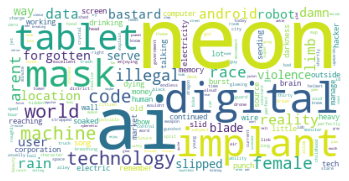

In [125]:
plt.imshow(wc1)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

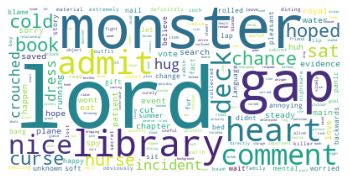

In [126]:
plt.imshow(wc2)
plt.axis('off')

In [4]:
f=open("neuromancien.txt", 'r')
content = f.read()
process_content = Preprocess_English_Sentence(content)

In [128]:
process_content

'sky port color television tuned dead channel like case someone say shouldered way crowd around door chat like body massive drug deficiency sprawl voice sprawl joke bar professional expatriate could drink week never hear two word tending bar prosthetic arm monotonously filled tray glass draft saw case teeth web work east steel brown decay case found place bar unlikely tan one zone whore crisp naval uniform tall whose cheekbone ridged precise row tribal scar wage early two joe boy said draft across bar good hand maybe business case case girl right bartender smile ugliness stuff legend age affordable beauty something heraldic lack antique arm another mug military prosthesis manipulator cased grubby pink plastic much artiste case sound laughter overhang belly pink claw artiste slightly funny deal sure case said beer somebody got ta funny around sure whore giggle went octave either sister vanish zone he close personal friend mine case eye made possible spitting sound lip barely moving left

In [129]:
import pickle
# save the model to disk
filename = 'finalized_model_downsample.sav'
pickle.dump(lr, open(filename, 'wb'))

In [130]:
import os
os.listdir()

['.ipynb_checkpoints',
 '1V1.ipynb',
 'Altered-Carbon-_Takeshi-Kovacs_-Book-1_-_Richard-K.-Morgan_-_z-lib.org_.txt',
 'Cyberpunk Years.ipynb',
 'finalized_model.sav',
 'finalized_model_downsample.sav',
 'flaskFunction.ipynb',
 'Multiclassification.ipynb',
 'neuromancien.txt',
 'TDIDF.ipynb',
 'the-vx-wars.txt',
 'untitled.txt']

In [145]:
f = open("neuromancien.txt", "r")
content = f.read()
process_content = Preprocess_French_Sentence(content)

matrix = vectorizer.fit_transform([process_content])

lr.predict(matrix.todense())

D:\Logiciel\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



array([1], dtype=int64)

In [146]:
lr_local = lr.explain_local(pd.DataFrame(matrix.todense()), name="Logistic Regression")

In [148]:
lr_local.data(0)["perf"]["predicted_score"]

0.8573697928276772

In [132]:
f = open("Altered-Carbon-_Takeshi-Kovacs_-Book-1_-_Richard-K.-Morgan_-_z-lib.org_.txt", "r",encoding="utf-8")
content = f.read()
process_content = Preprocess_French_Sentence(content)

matrix = vectorizer.fit_transform([process_content])

lr.predict(matrix.todense())

D:\Logiciel\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



array([1], dtype=int64)

In [133]:
pd.DataFrame(matrix.todense())

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [134]:
lr_local = lr.explain_local(pd.DataFrame(matrix.todense()), name="Logistic Regression")

In [135]:
lr_local.data(0)["perf"]["predicted_score"]

0.6517441154178056

In [137]:
df = pd.DataFrame({"Word":lr_global.data()["names"],"Score":lr_global.data()["scores"]},index=lr_global.data()["names"])

In [138]:
df["Abs_score"]=df["Score"].apply(abs)

In [139]:
df["Color"] = df["Score"].apply(lambda x : 1 if x > 0 else 0)

In [140]:
df = df.sort_values("Abs_score",ascending=True)

In [141]:
def getPredictionFromNumber(number):
    if number == 1 :
        return "Cyberpunk"
    else : 
        return "Not Cyberpunk"

In [142]:
import plotly_express as px
data = df[df["Score"]!=0]
fig = px.bar(data,  y='Word',x='Score', color="Color", orientation='h',
            color_continuous_scale='Bluered_r')
fig.update(layout_coloraxis_showscale=False)
fig.update_yaxes(range=[len(data)-60, len(data)])
fig.update_layout(title={"text":"ee"})
fig.show()

In [39]:
show(lr_local)

D:\Logiciel\Anaconda\lib\site-packages\interpret\visual\udash.py:5: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

D:\Logiciel\Anaconda\lib\site-packages\interpret\visual\udash.py:6: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

D:\Logiciel\Anaconda\lib\site-packages\interpret\visual\udash.py:7: UserWarning:


The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`



<!-- http://127.0.0.1:7001/2475810503312/ -->

In [40]:
show([lr_local])

<!-- http://127.0.0.1:7001/2475060390080/ -->
 Open in new window

In [43]:
vectorizer

CountVectorizer(binary=True, max_features=3000, stop_words='english',
                vocabulary=['one', 'like', 'said', 'back', 'would', 'could',
                            'time', 'eye', 'know', 'get', 'hand', 'around',
                            'dont', 'see', 'even', 'head', 'way', 'didnt',
                            'look', 'still', 'face', 'right', '’', 'u', 'room',
                            'door', 'man', 'going', 'well', 'something', ...])

In [16]:
import pickle
# save the model to disk
filename = 'gradient_boosting.sav'
model = pickle.load(open(filename, 'rb'))

f = open("neuromancien.txt", "r")
content = f.read()
process_content = Preprocess_English_Sentence(content)

matrix = vectorizer.fit_transform([process_content])

model.predict(pd.DataFrame(matrix.todense(),columns=vocab))


array([1], dtype=int64)

In [14]:
pd.DataFrame(matrix.todense())

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,1,1,0,0,0,1,1,1,0,...,1,0,1,1,1,1,1,1,0,0


In [ ]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
model = pickle.load(open(filename, 'rb'))

f = open("neuromancien.txt", "r")
content = f.read()
process_content = Preprocess_English_Sentence(content)

matrix = vectorizer.fit_transform([process_content])

model.predict(matrix.todense())


In [42]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
lr = pickle.load(open(filename, 'rb'))

lr_global = lr.explain_global(name="Logistic Regression")

df = pd.DataFrame({"Word":lr_global.data()["names"],"Score":lr_global.data()["scores"]},index=lr_global.data()["names"])

df["Abs_score"]=df["Score"].apply(abs)

df["Color"] = df["Score"].apply(lambda x : 1 if x > 0 else 0)

df = df.sort_values("Abs_score",ascending=True)

import plotly_express as px
data = df[df["Score"]!=0]
fig = px.bar(data,  y='Word',x='Score', color="Color", orientation='h',
            color_continuous_scale='Bluered_r')
fig.update(layout_coloraxis_showscale=False)
fig.update_yaxes(range=[len(data)-60, len(data)])
fig.update_layout(title={"text":"Récapitulatif des mots significatif du cyberpunk (bleu) contre ceux s'en éloignant"})

D:\Logiciel\Anaconda\lib\site-packages\sklearn\base.py:329: UserWarning:

Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations



# TFIDF

In [4]:
cyberpunk = pd.read_json("../Processing/processed_files/wattpad/cyberpunk-preprocessed.json")
cyberpunk["genre_text"] = 1
space = pd.read_json("../Processing/processed_files/wattpad/space-preprocessed.json")
space["genre_text"] = 0
romance = pd.read_json("../Processing/processed_files/wattpad/romance-preprocessed.json")
romance["genre_text"] = 0
crime = pd.read_json("../Processing/processed_files/wattpad/crime-preprocessed.json")
crime["genre_text"] = 0

thriller = pd.read_json("../Processing/processed_files/wattpad/thriller-preprocessed.json")
thriller["genre_text"] = 0
vampire = pd.read_json("../Processing/processed_files/wattpad/vampire-preprocessed.json")
vampire["genre_text"] = 0
fantasy = pd.read_json("../Processing/processed_files/wattpad/fantasy-preprocessed.json")
fantasy["genre_text"] = 0


science_fantasy = pd.read_json("../Processing/processed_files/wattpad/science-fantasy-preprocessed.json")
science_fantasy["genre_text"] = 0
steampunk = pd.read_json("../Processing/processed_files/wattpad/steampunk-preprocessed.json")
steampunk["genre_text"] = 0
horror = pd.read_json("../Processing/processed_files/wattpad/horror-preprocessed.json")
horror["genre_text"] = 0

humour = pd.read_json("../Processing/processed_files/wattpad/humour-preprocessed.json")
humour["genre_text"] = 0
dystopie = pd.read_json("../Processing/processed_files/wattpad/dystopie-preprocessed.json")
dystopie["genre_text"] = 0

merge_df = cyberpunk.append(space).append(romance).append(crime).append(thriller).append(vampire).append(fantasy)
merge_df = merge_df.append(science_fantasy).append(steampunk).append(horror).append(humour).append(vampire).append(dystopie).sample(frac=1)

In [5]:

# Permet la suppression des histoires apparaissant dans deux genres différents
a.drop_duplicates(subset=['story_id'],keep=False,inplace=True)
merge_df.drop(columns=["story_title","story_id"],inplace=True)

In [163]:
cyb = merge_df.query("genre_text == 1")
notCyb= merge_df.query("genre_text == 0")

In [168]:
notCyb_resamp = resample(notCyb, n_samples=len(cyb), random_state=0)
merge_df_3 = notCyb_resamp.append(cyb).sample(frac=1)
X = merge_df_3.drop(columns=["genre_text"])
y_TFID_resample = merge_df_3["genre_text"]

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk.stem
from nltk.corpus import stopwords
english_stemmer=nltk.stem.SnowballStemmer('english')
stwe=stopwords.words('english')
class EnglishStemmedTfidfVectorizer(TfidfVectorizer):#EnglishtemmedTfidVectorizer hérite de TfidVectorizer
    def build_analyzer(self):
        analyzer = super(EnglishStemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))


In [170]:
ftvectorizer = EnglishStemmedTfidfVectorizer(max_df=0.6, stop_words=stwe,decode_error='ignore',vocabulary = vocab)
#ne retient que les termes qui apparaissent dans au plus 60% des documents
X = ftvectorizer.fit_transform(merge_df_3["story_text"])
dico=ftvectorizer.vocabulary_
Ps=len(dico)
print("taille du vocabulaire après suppression des stop_words : ",Ps)


taille du vocabulaire après suppression des stop_words :  3000


In [171]:
df = pd.DataFrame(X.toarray(),columns = dico)

In [182]:
X_TFIDF_resample = df

In [33]:
df["genre_text"] = y.values

In [43]:
mean_cyb = df.query("genre_text == 1").drop(columns=["genre_text"]).mean().sort_values(ascending=False).reset_index()[:100]

In [45]:
mean_not = df.query("genre_text == 0").drop(columns=["genre_text"]).mean().sort_values(ascending=False).reset_index()[:100]

In [47]:
mean_cyb["not"] = mean_not[0]

In [49]:
mean_cyb["diff"] = mean_cyb[0] - mean_cyb["not"]

In [51]:
mean_cyb["abs_diff"] = mean_cyb["diff"].apply(abs)

In [53]:
mean_cyb.sort_values(by="abs_diff",ascending=False,inplace=True)

In [ ]:
seed=42
X_train_tfidf_resample, X_test_tfidf_resample, y_train_tfidf_resample, y_test_tfidf_resample = train_test_split(X_TFIDF_resample, y_TFID_resample, test_size=0.20, random_state=seed)

In [175]:
clf = LogisticRegression(penalty="l1",solver="liblinear").fit(X_train, y_train)
clf.score(X_test, y_test)

0.78419452887538

In [80]:
 ### Pour le nuage de mot
    
lr = LogisticRegression(random_state=seed, penalty='l1', solver='liblinear')
    
lr.fit(X_train, y_train)

score = lr.score(X_test, y_test)

lr_global = lr.explain_global(name="Logistic Regression")

lr_local = lr.explain_local(X_test, y_test, name="Logistic Regression")
    
words = X_train.columns[0:3000]
scores = lr_global.data()["scores"]

res = {words[i]: scores[i] for i in range(len(words))}


idx_1 = np.array(scores) > 0
words_selected_1 = words[idx_1]

words_1 = {key: res[key] for key in words_selected_1}
wc1 = wordcloud.WordCloud(
    background_color = 'white', 
    max_words=200,
    max_font_size=100).generate_from_frequencies(words_1)

idx_2 = np.array(scores) < 0
words_selected_2 = words[idx_2]

words_2 = {key: res[key]*-1 for key in words_selected_2}
wc2 = wordcloud.WordCloud(
    background_color = 'white', 
    max_words=200,
    max_font_size=100).generate_from_frequencies(words_2)

print(score)

0.8085106382978723


(-0.5, 399.5, 199.5, -0.5)

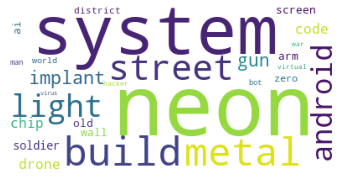

In [82]:
plt.imshow(wc1)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

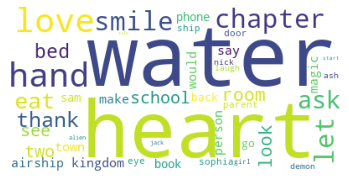

In [81]:
plt.imshow(wc2)
plt.axis('off')

Fréquence des mots semble moins caractéristique alors que la présence ou non d'un ensemble semble l'être plus

In [152]:
y_TFID_resample

490     0
1149    0
586     1
781     1
718     1
       ..
543     1
587     1
373     1
510     1
303     1
Name: genre_text, Length: 1642, dtype: int64

In [149]:
X_TFID_resample

,one,like,said,back,would,could,time,eye,know,get,...,butterfly,traveling,strangely,blurred,armored,handsome,linked,satellite,mortal,decent
0,0.099889,0.147751,0.163096,0.116312,0.067583,0.058166,0.066621,0.051785,0.082188,0.117687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0017,0.004274
1,0.023705,0.094647,0.164178,0.049788,0.050745,0.025372,0.048435,0.050465,0.101739,0.049910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000
2,0.089361,0.165653,0.014736,0.053624,0.013664,0.040991,0.039125,0.067942,0.109579,0.067195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000
3,0.131972,0.237116,0.030467,0.000000,0.084752,0.056502,0.080894,0.028095,0.084961,0.138931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000
4,0.097600,0.024355,0.000000,0.051247,0.052232,0.052232,0.000000,0.000000,0.026180,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,0.066618,0.094994,0.263647,0.089947,0.071303,0.101861,0.126392,0.060780,0.071479,0.030056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000
1638,0.043532,0.108630,0.000000,0.000000,0.069890,0.046593,0.000000,0.000000,0.000000,0.045827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000
1639,0.070149,0.046680,0.026991,0.049111,0.100109,0.075082,0.023888,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000
1640,0.035871,0.007460,0.020703,0.047088,0.041594,0.023996,0.045808,0.015909,0.017641,0.034616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000


In [89]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [ ]:
clf = RandomForestClassifier(max_features=1000, random_state=0)
print("Score : ",cross_val_score(clf, X_TFIDF_resample, y_TFID_resample, 
                                       cv=5,verbose=0,n_jobs=-1).mean() )

In [98]:
clf = GradientBoostingClassifier( random_state=0)
print("Score : ",cross_val_score(clf, X_TFIDF_resample, y_TFID_resample, 
                                       cv=5,verbose=0,n_jobs=-1).mean() )

Score :  0.8483560679071835


In [99]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[142,  25],
       [ 18, 144]], dtype=int64)

In [94]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [95]:
svmModel = svm.SVC(decision_function_shape='ovo',kernel="linear")


print("Score : ",cross_val_score(svmModel, df, y, 
                                       cv=5,verbose=0,n_jobs=-1).mean() )

Score :  0.8483616279931796


In [143]:
models = [
    ('Lasso regression', LogisticRegression(penalty="l1",solver="liblinear")),
    ('Random forest sqrt', RandomForestClassifier( random_state=0)),
    ('SVM', svm.SVC(decision_function_shape='ovo',kernel="linear")),
    ('GradientBoosting', GradientBoostingClassifier( random_state=0))
]


In [180]:
datas = [
    ("Bag",X_Bag,y_Bag),
    ("Bag resample",X_bag_resample,y_bag_resample,X_train_bag_resample, X_test_bag_resample, y_train_bag_resample, y_test_bag_resample),
    ("TFIDF resample",X_TFID_resample,y_TFID_resample)
    
]

In [ ]:
# permet d'afficher le pourcentage d etrue positif par classe
def printTP(y_pred,y_true):
    labels = [ 1, 0]
    matrix = confusion_matrix(y_true, y_pred, labels=labels)
    diag = np.diag(matrix)
    print("Pourcentage de True Positif par classe")
    for i,target in enumerate(matrix):
        print(labels[i],":",round(diag[i]/target.sum()*100,2),"%")

In [144]:
for model in models :
    for data in datas :
        print(model[0],data[0],cross_val_score(model[1], data[1], data[2], 
                                       cv=5,verbose=0,n_jobs=-1).mean())
        model[1].fit(data[3], data[4])
        y_pred = model[1].predict(data[5])
        printTP(y_pred,data[6])

Lasso regression Bag 0.9353179972936401
Lasso regression Bag resample 0.8234024019571503
Lasso regression TFIDF resample 0.5140058566239157
Random forest sqrt Bag 0.9284618854307624
Random forest sqrt Bag resample 0.7953628882793387
Random forest sqrt TFIDF resample 0.4896656534954407
SVM Bag 0.920342805593144
SVM Bag resample 0.8099970346208021
SVM TFIDF resample 0.5006190229075542


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Logiciel\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-145-bde19cda4761>", line 3, in <module>
    print(model[0],data[0],cross_val_score(model[1], data[1], data[2],
  File "D:\Logiciel\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 509, in cross_val_score
    cv_results = cross_validate(
  File "D:\Logiciel\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 267, in cross_validate
    results = parallel(
  File "D:\Logiciel\Anaconda\lib\site-packages\joblib\parallel.py", line 1061, in __call__
    self.retrieve()
  File "D:\Logiciel\Anaconda\lib\site-packages\joblib\parallel.py", line 940, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "D:\Logiciel\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 542, in wrap_future_result
    return futur

TypeError: object of type 'NoneType' has no len()

In [141]:
from sklearn.linear_model import LogisticRegression